# Notebook Parameters

In [1]:
main_dir = '/Users/davide/Developer/ml-tropical-cyclones-detection-release'

# path to dataset directory (if CMIP6 data must be in the proper grid format)
# dataset_dir = f'{main_dir}/data/projections/nicam16-9s/'
dataset_dir = f'{main_dir}/data/datasets/north_pacific/'

# path to model that we want to use in inference
model_dir = f'{main_dir}/backup/04_vgg_v3_vo_850'

# path to IBTrACS file to match ML model detections
ibtracs_src = f'{main_dir}/data/ibtracs/filtered/ibtracs_main-tracks_6h_1980-2021_TS-NR-ET-MX-SS-DS.csv'

# year to test
year = 1993

# device used for the inference
device = 'mps'

# define lat and lon ranges
lat_range = (0,70)
lon_range = (100,320)

## Inference Workflow

In [2]:
import torch
import sys

import warnings
warnings.filterwarnings('ignore')

sys.path.append('../resources/library')
from tropical_cyclone.inference import SingleModelInference, get_observations, get_observed_tracks
from tropical_cyclone.visualize import plot_detections, plot_tracks
from tropical_cyclone.models import *

In [3]:
import xarray as xr
xr.open_dataset('../data/datasets/sg_patches/mean_1980_2009.nc')

<xarray.Dataset> Size: 56B
Dimensions:  ()
Data variables:
    fg10     float64 8B ...
    i10fg    float64 8B ...
    msl      float64 8B ...
    t_500    float64 8B ...
    t_300    float64 8B ...
    vo_850   float64 8B ...
    sst      float64 8B ...

In [4]:
inference = SingleModelInference(model_dir=model_dir, device=device)
ds, dates = inference.load_dataset(dataset_dir=dataset_dir, year=year)
detections = inference.predict(ds, patch_size=40)

Munch({'mean': '../data/datasets/sg_patches/mean_1980_2009.nc', 'std': '../data/datasets/sg_patches/std_1980_2009.nc'})
/Users/davide/Developer/ml-tropical-cyclones-detection-release/notebook


100%|██████████| 7/7 [00:05<00:00,  1.25it/s]


In [5]:
observations = get_observations(ibtracs_src=ibtracs_src, dates=dates, lat_range=lat_range, lon_range=lon_range)

# Apply Tracking Algorithm

In [6]:
det_tracks = inference.tracking(detections, max_distance=400.0, min_track_count=12)
obs_tracks = get_observed_tracks(observations)

## Detections

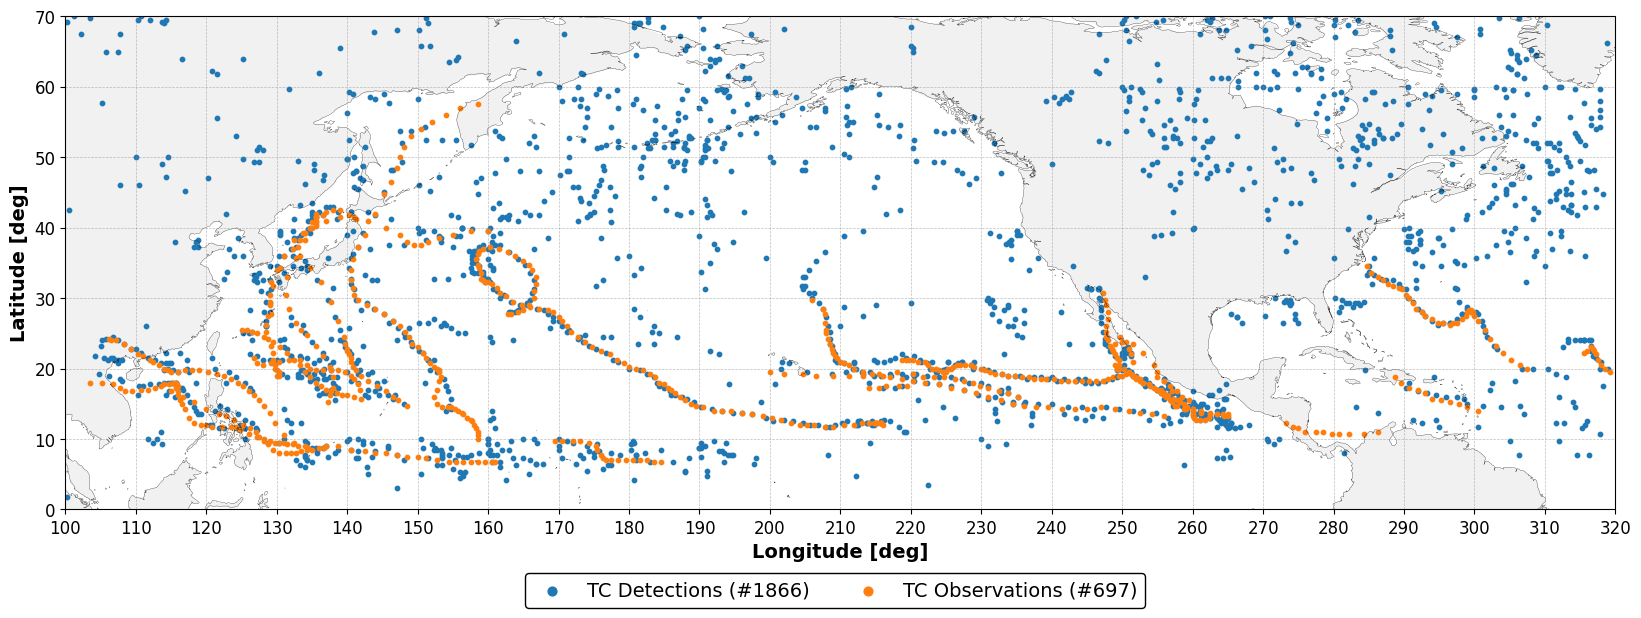

In [7]:
plot_detections(detections, observations, lat_range, lon_range)

## Tracks

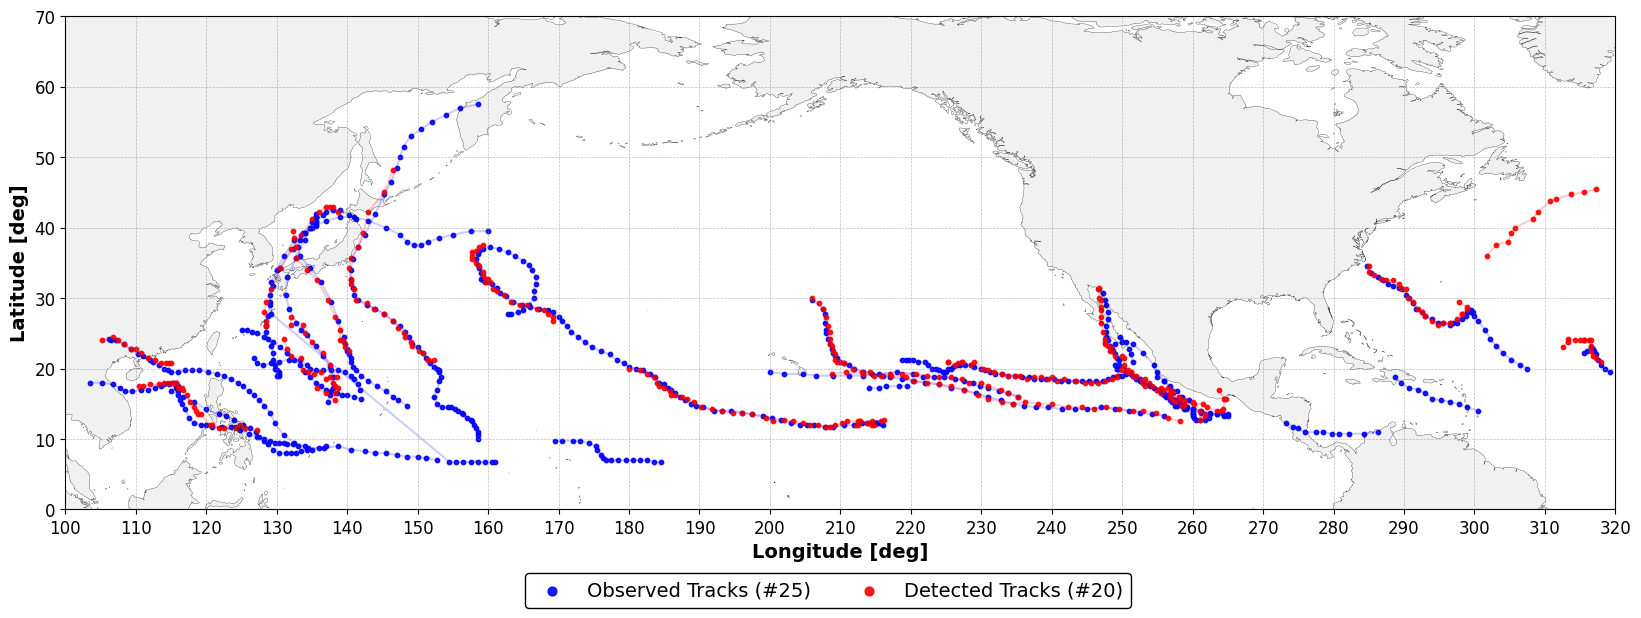

In [8]:
plot_tracks(det_tracks, obs_tracks, lat_range, lon_range)